In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import read_csv
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import math
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import r2_score

#read csv file into a data frame
df1=read_csv('SolarPrediction.csv')
time=df1['Time'].values

## 1. Pre-processing

In [3]:
# checking for missing values
df1.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [4]:
# convert HH:MM:SS into seconds 
i=0
TimeX=[]
DayLen=[]

time1=df1['TimeSunRise'].values
time2=df1['TimeSunSet'].values

for i in range(len(time)):
    temp=(int(time[i][0:2])*3600+int(time[i][3:5])*60+int(time[i][6:8]))
    TimeX.append(temp)
    temp1=(int(time1[i][0:2])*3600+int(time1[i][3:5])*60+int(time1[i][6:8]))
    temp2=(int(time2[i][0:2])*3600+int(time2[i][3:5])*60+int(time2[i][6:8]))
    DayLen.append(temp2-temp1)

df1['Time']=TimeX
df1['Day_length']=DayLen
df1 = df1.drop(['UNIXTime','TimeSunRise','TimeSunSet'], axis=1)

In [5]:
#extracting month from Data column
df1['Month']=[d.split('/')[0] for d in df1.Data]
df1['Day_of_month']=[d.split('/')[1] for d in df1.Data]
df1 = df1.drop(['Data'], axis=1)

In [6]:
# computing new column with effective wind speed
temp = []
for i in range(len(df1['WindDirection(Degrees)'])):
    temp.append((math.cos(df1['WindDirection(Degrees)'][i]))*df1['Speed'][i])
df1['Wind_speed']=temp
df1 = df1.drop(['Speed', 'WindDirection(Degrees)'], axis=1)

In [7]:
#Transform the time_in_sec and month columns to integer labels
le = preprocessing.LabelEncoder()
df1.Time = le.fit_transform(df1.Time)
df1.Month = le.fit_transform(df1.Month)
df1.Day_of_month=le.fit_transform(df1.Day_of_month)

In [8]:
# moving radiation to the last column
df1['Radiation_target']=df1['Radiation']
df1 = df1.drop(['Radiation'], axis=1)
df1['Radiation']=df1['Radiation_target']
df1 = df1.drop(['Radiation_target'], axis=1)

## 2.Data Visualization

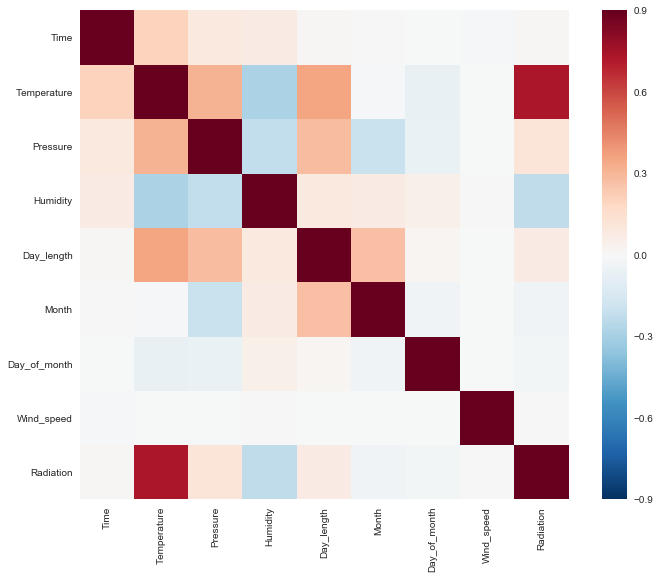

In [9]:
# Heatmap of correlation between all the features
corrmat = df1.corr(method='pearson')
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

#### Scatter plots

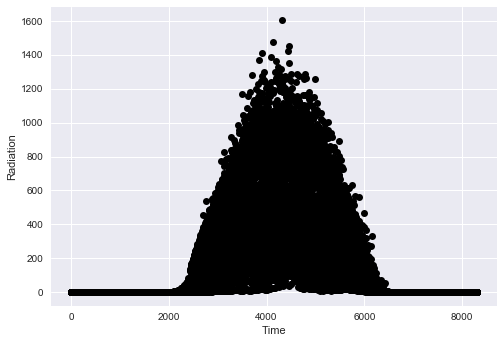

In [10]:
# Radiation v/s Time
plt.plot(df1['Time'], df1['Radiation'],'ro', color='black')
plt.xlabel('Time')
plt.ylabel('Radiation')
plt.show()

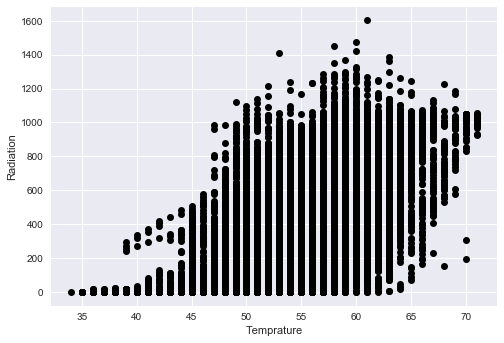

In [14]:
# Radiation v/s Temperature
plt.plot(df1['Temperature'], df1['Radiation'],'ro', color='black')
plt.xlabel('Temprature')
plt.ylabel('Radiation')
plt.show()

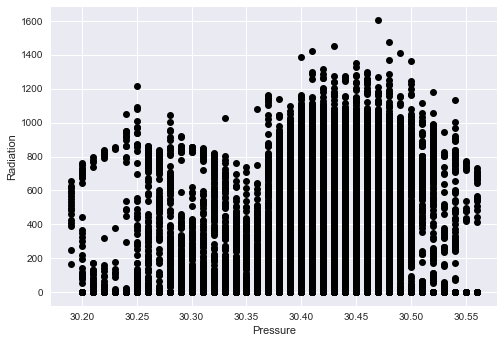

In [19]:
# Radiation v/s Pressure
plt.plot(df1['Pressure'], df1['Radiation'], 'ro', color='black')
plt.xlabel('Pressure')
plt.ylabel('Radiation')
plt.show()

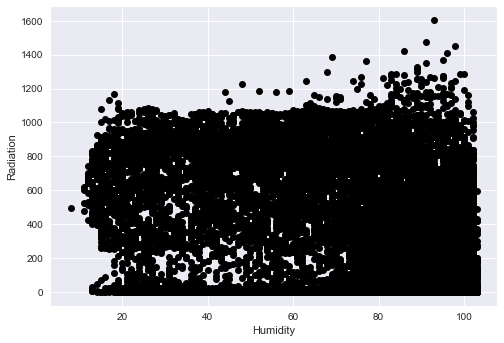

In [43]:
# Radiation v/s Humidity
plt.plot(df1['Humidity'], df1['Radiation'], 'ro', color='black')
plt.xlabel('Humidity')
plt.ylabel('Radiation')
plt.show()

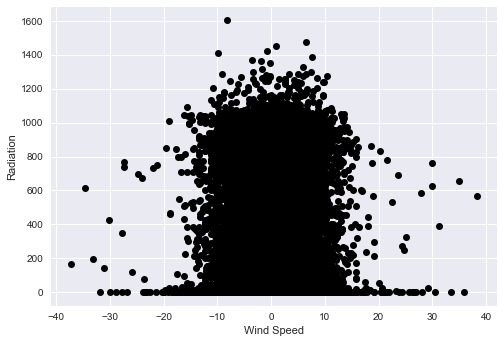

In [32]:
# Radiation v/s WindDirection
plt.plot(df1['Wind_speed'], df1['Radiation'], 'ro', color='black')
plt.xlabel('Wind Speed')
plt.ylabel('Radiation')
plt.show()

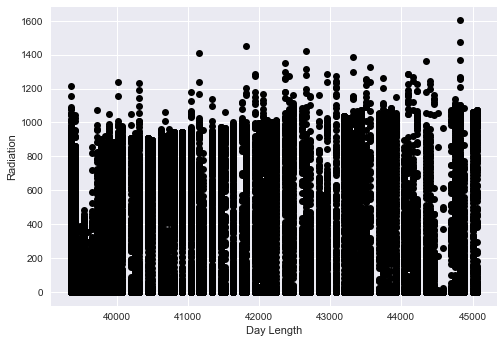

In [14]:
# Radiation v/s day_length
plt.plot(df1['Day_length'], df1['Radiation'], 'ro', color='black')
plt.xlabel('Day Length')
plt.ylabel('Radiation')
plt.show()

## 3.Model Fitting

In [15]:
# writing our pre-processed dataframe to a csv file for future use
df1.to_csv('SolarProcessed.csv')

### Linear Model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import r2_score

X_train, X_test, Y_train, Y_test= train_test_split(df1.iloc[:,0:8], df1['Radiation'], random_state= 1)
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)

LinReg= LinearRegression().fit(X_train_transformed,Y_train)
y_pred=LinReg.predict(X_test_transformed)
y_pred
x=LinReg.score(X_test_transformed,Y_test)
print("Linear Regression score : ",x)

Target_predicted= LinReg.predict(X_test) 
print("MSE : ",mean_squared_error(Y_test,Target_predicted))

poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

LinReg= LinearRegression().fit(X_poly_train,Y_train)
y_pred=LinReg.predict(X_poly_test)
x=LinReg.score(X_poly_test,Y_test)
print("Polynomial Regression score : ",x)
print("MSE : ",mean_squared_error(Y_test,y_pred))

Linear Regression score :  0.606702032243
MSE :  1.06435041612e+14
Polynomial Regression score :  0.73781760009
MSE :  26009.9943672


### Decision Tree

In [49]:
from sklearn.metrics import mean_squared_error
X_train, X_test, Y_train, Y_test= train_test_split(df1.iloc[:,0:8], df1['Radiation'], random_state= 1)
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0).fit(X_train_transformed, Y_train)
x=regressor.score(X_test_transformed,Y_test)
print("Decision Tree Regressor score : ",x)
Target_predicted= regressor.predict(X_test) 
print(mean_squared_error(Y_test,Target_predicted))

Decision Tree Regressor score :  0.897313351481


129197.54123656388

### Neural Network

In [32]:
X_train, X_test, Y_train, Y_test= train_test_split(df1.iloc[:,0:8], df1['Radiation'], random_state= 1)
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)

regressor=MLPRegressor(solver='adam', activation='relu', random_state=0,hidden_layer_sizes=(100,), alpha=900).fit(X_train_transformed, Y_train)
x=regressor.score(X_test_transformed,Y_test)
print("Neural network / MLP Regressor score : ",x)

Neural network / MLP Regressor score :  0.619822335427


### Random Forest Regressor

In [19]:
X_train, X_test, Y_train, Y_test= train_test_split(df1.iloc[:,0:8], df1['Radiation'], random_state= 1)
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=300, random_state=0).fit(X_train_transformed, Y_train)

x=regressor.score(X_test_transformed,Y_test)
print("Random Forest Regressor score : ",x)

Random Forest Regressor score :  0.942066903866


### Gradient Booster Regressor

In [21]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=4200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread=-1)
model_score_error(model_xgb)

ModuleNotFoundError: No module named 'xgboost'